In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [47]:
# Read the data
df = pd.read_csv('Height_Weight.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
print (df.shape)

(10000, 3)


Text(0.5, 1.0, 'Height v/s Weight plot for Male and Females')

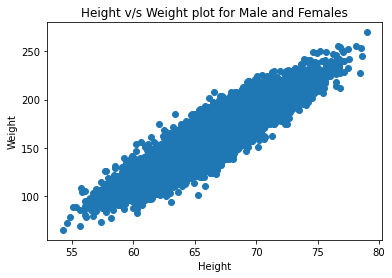

In [4]:
# plot the data
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for Male and Females')

As height increases weight also increases

## Take sample of 20 and plot the data using '.sample' method

Text(0.5, 1.0, 'Height v/s Weight plot for 10 random Male and Females')

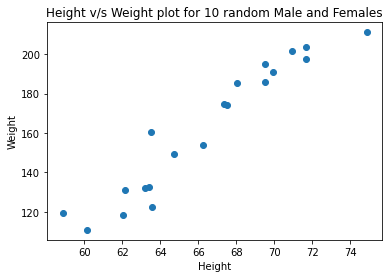

In [8]:
s_df = df.sample(n=20, random_state=11) 
plt.scatter(s_df['Height'], s_df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height v/s Weight plot for 10 random Male and Females')

In [9]:
train, test = train_test_split(s_df, test_size=0.3, random_state=11)

In [10]:
print (test)

      Gender     Height      Weight
5857  Female  62.149296  131.114973
9821  Female  63.382801  132.573837
3527    Male  71.695482  197.375666
5129  Female  63.493143  160.554604
2817    Male  67.524639  174.399730
1769    Male  69.963912  191.065448


## Split into Train and Test sets

In [11]:

train = train.sort_values('Height')
test = test.sort_values('Height')

# predictors
xtrain = train['Height'].to_frame()
xtest  = test['Height'].to_frame()

# output
ytrain = train['Weight']
ytest  = test['Weight']

In [12]:
print (xtrain)

         Height
6984  58.850294
7899  60.141442
8689  62.026069
6353  63.182618
7953  63.546698
9847  64.720574
6011  66.261527
3026  67.352019
1703  68.024569
3104  69.491523
415   69.534862
746   70.958049
3538  71.687392
3327  74.885219


In [13]:
print (type(s_df))
print (type(train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [14]:
# 70 % data in training
print (xtrain.shape)
print (ytrain.shape)
# 30 % data in test
print (xtest.shape)
print (ytest.shape)

(14, 1)
(14,)
(6, 1)
(6,)


# Instantiate Linear Regression Model

In [15]:
lr = LinearRegression().fit(xtrain, ytrain)

# Calculate Score

In [16]:
# the score is actually coefficient of determination
lr.score(xtrain, ytrain)

0.9287180981500764

# Calc coefficients and intercept

In [18]:
lr.coef_ , lr.intercept_

# weight = -337.982 +7.517*height

(array([7.51737796]), -337.98243553254736)

# Plot the line 

In [19]:
ypred = lr.predict(xtrain)

In [20]:
print (type(xtrain))
print (type(ypred))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [21]:
print (xtrain.loc[:,'Height'])

6984    58.850294
7899    60.141442
8689    62.026069
6353    63.182618
7953    63.546698
9847    64.720574
6011    66.261527
3026    67.352019
1703    68.024569
3104    69.491523
415     69.534862
746     70.958049
3538    71.687392
3327    74.885219
Name: Height, dtype: float64


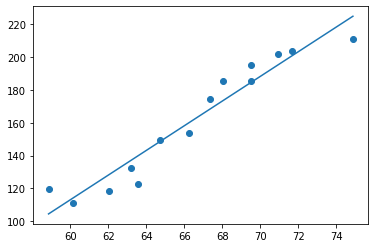

In [22]:
plt.scatter(xtrain, ytrain)
plt.plot(xtrain.loc[:,'Height'], ypred)

### Increase complexity of features using PolynomialFeatures

In [23]:
from sklearn.preprocessing import PolynomialFeatures
p = PolynomialFeatures(degree=4)
px = p.fit_transform(xtrain) # transforming xtrain into a polynomial one with deg=4
p.fit(px, ytrain) # using transformed xtrain and refitting into the model along with ytrain
# weight = 1 + height + heightˆ2 + heightˆ3 

PolynomialFeatures(degree=4)

In [24]:
print (xtrain)
print ('******************')
print (p)
print ('******************')
print (px)

         Height
6984  58.850294
7899  60.141442
8689  62.026069
6353  63.182618
7953  63.546698
9847  64.720574
6011  66.261527
3026  67.352019
1703  68.024569
3104  69.491523
415   69.534862
746   70.958049
3538  71.687392
3327  74.885219
******************
PolynomialFeatures(degree=4)
******************
[[1.00000000e+00 5.88502945e+01 3.46335716e+03 2.03819589e+05
  1.19948428e+07]
 [1.00000000e+00 6.01414416e+01 3.61699300e+03 2.17531173e+05
  1.30826383e+07]
 [1.00000000e+00 6.20260694e+01 3.84723328e+03 2.38628758e+05
  1.48012039e+07]
 [1.00000000e+00 6.31826178e+01 3.99204319e+03 2.52227739e+05
  1.59364088e+07]
 [1.00000000e+00 6.35466976e+01 4.03818278e+03 2.56613180e+05
  1.63069202e+07]
 [1.00000000e+00 6.47205744e+01 4.18875275e+03 2.71098484e+05
  1.75456496e+07]
 [1.00000000e+00 6.62615270e+01 4.39058997e+03 2.90927196e+05
  1.92772803e+07]
 [1.00000000e+00 6.73520187e+01 4.53629443e+03 3.05528587e+05
  2.05779672e+07]
 [1.00000000e+00 6.80245692e+01 4.62734201e+03 3.1477

In [25]:
lr = LinearRegression().fit(px, ytrain) # using transformed xtrain along with ytrain in LinearRegression to check score
lr.score(px, ytrain)

0.984239632181901

# Plot the new line

In [26]:
p_ypred = lr.predict(px)

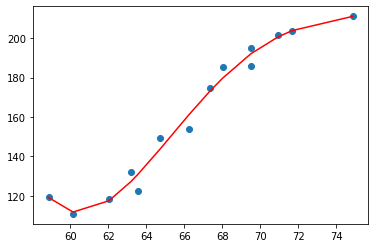

In [27]:
plt.scatter(xtrain.loc[:,'Height'], ytrain)
plt.plot(xtrain.loc[:,'Height'], p_ypred, color = 'red')

# Plot multiple polynomial correlations with a range of degrees

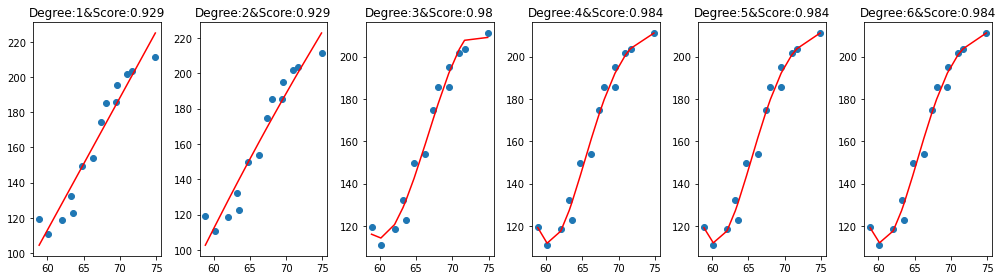

In [28]:
fig, ax = plt.subplots(1,6, figsize=(14,4))

for x, deg in enumerate([1,2,3,4,5,6]):
    p = PolynomialFeatures(degree=deg)
    p_x = p.fit_transform(xtrain)
    p.fit(p_x, ytrain)
    
    lr = LinearRegression().fit(p_x, ytrain)
    score_val = lr.score(p_x, ytrain)
    
    p_ypred = lr.predict(p_x)
    ax[x].scatter(xtrain.loc[:,'Height'], ytrain)
    ax[x].plot(xtrain.loc[:,'Height'], p_ypred, color='red')
    title_text = 'Degree:'+str(deg)+'&'+'Score:'+str(round(score_val,3))
    ax[x].set_title(title_text)
    plt.tight_layout()

# Dataset - insurance

In [3]:
from mlxtend.evaluate import bias_variance_decomp

In [4]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
print (insurance.shape)

(1338, 7)


In [33]:
# just an example
# understand pd.get_dummies convert your categorical data to numeric data
con = pd.Series(list('abcba'))
print (con)
print ('******************')
print(pd.get_dummies(con))

0    a
1    b
2    c
3    b
4    a
dtype: object
******************
   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  1  0  0


In [6]:
# convert categorical columns to numerical columns
ohe = pd.get_dummies(insurance.drop(columns=['age', 'bmi', 'children', 'charges']), drop_first=True)
#ohe = pd.get_dummies(insurance.drop(columns=['age', 'bmi', 'children', 'charges']))
ohe.head() 

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [8]:
x = insurance.drop(columns='charges')
ohe_x = pd.concat([x, ohe], axis=1) # axis = 1 means along column
ohe_x.head()

,age,sex,bmi,children,smoker,region,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1,0,0,1,0
2,28,male,33.000,3,no,southeast,1,0,0,1,0
3,33,male,22.705,0,no,northwest,1,0,1,0,0
4,32,male,28.880,0,no,northwest,1,0,1,0,0


In [9]:
ohe_x = ohe_x.drop(columns=['sex', 'smoker', 'region'])
ohe_x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [10]:
y = insurance['charges']

In [11]:
x1train, x1test, y1train, y1test = train_test_split(ohe_x, y, test_size = 0.2, random_state=1)

In [12]:
x1train.shape, x1test.shape, y1train.shape, y1test.shape

((1070, 8), (268, 8), (1070,), (268,))

# Calc overall bias and variance along with training and testing error

In [13]:
all_bias = []
all_var  = []
all_test_loss = []
all_train_loss = []

for x in range(1, 15):
    dr = DecisionTreeRegressor(max_depth=x)
    avg_exp_loss, avg_bias, avg_var = bias_variance_decomp(dr, x1train.values, y1train.values, x1test.values, y1test.values, loss='mse', random_seed=123)    
    
    all_test_loss.append(avg_exp_loss) # test-loss
    all_bias.append(avg_bias)
    all_var.append(avg_var)
    
    avg_exp_loss, avg_bias, avg_var = bias_variance_decomp(dr, x1train.values, y1train.values, x1train.values, y1train.values, loss='mse', random_seed=123)  
                                                                                            #providing train data twice coz by default it gives test loss only 
    all_train_loss.append(avg_exp_loss) # train-loss
    
    

# Plot the Bias and Variance

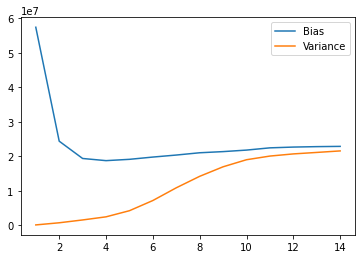

In [14]:
plt.plot(range(1, 15), all_bias)
plt.plot(range(1, 15), all_var)
plt.legend(['Bias', 'Variance'])

# Plot Training and Testing Errors

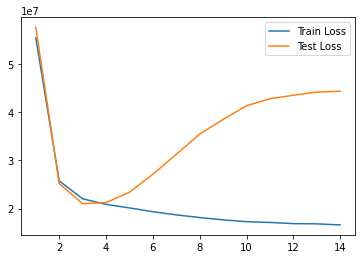

In [43]:
plt.plot(range(1, 15), all_train_loss)
plt.plot(range(1, 15), all_test_loss)
plt.legend(['Train Loss', 'Test Loss'])

In [44]:
a = np. array([[1, 2, 3], [4, 5, 6]])
print (a)
print (a.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [45]:
b = np. array([[10], [11]])
print (b)
print (b.shape)

[[10]
 [11]]
(2, 1)


In [46]:
c = a + b
print (c)

[[11 12 13]
 [15 16 17]]
